In [1]:
# =========================
# 📊 EDA for Online News Popularity
# =========================

!pip install seaborn matplotlib --quiet

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv("../notebook/data/OnlineNewsPopularity.csv")
df.columns = df.columns.str.strip()  # clean column names

print("✅ Dataset Loaded")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

✅ Dataset Loaded
Shape: (39644, 61)

Columns: ['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'ra

In [4]:
# Info & Missing Values
print("\n=== Dataset Info ===")
df.info()

print("\n=== Missing Values ===")
print(df.isnull().sum().sort_values(ascending=False))


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords            

In [5]:
# Remove extreme outliers (top 5%)
df = df[df['shares'] < df['shares'].quantile(0.95)]

In [6]:
# Target variable
df['popular'] = (df['shares'] > df['shares'].median()).astype(int)

In [7]:
# Extract publish day if available
if 'weekday_is_monday' in df.columns:
    df['publish_day'] = df.loc[:, 'weekday_is_monday':'weekday_is_sunday'].idxmax(axis=1)
    df['publish_day'] = df['publish_day'].apply(lambda x: x.split('_')[-1])

In [8]:
# Drop URL column if present
df.drop(['url'], axis=1, errors='ignore', inplace=True)

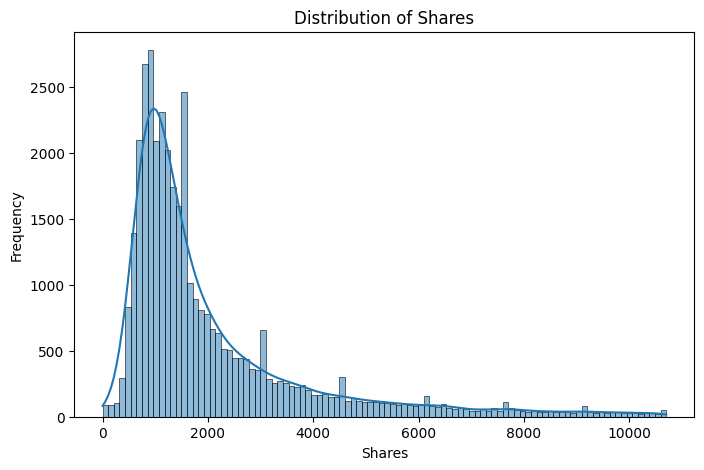

In [9]:
# === Distribution of Shares ===
plt.figure(figsize=(8, 5))
sns.histplot(df['shares'], bins=100, kde=True)
plt.title("Distribution of Shares")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.show()

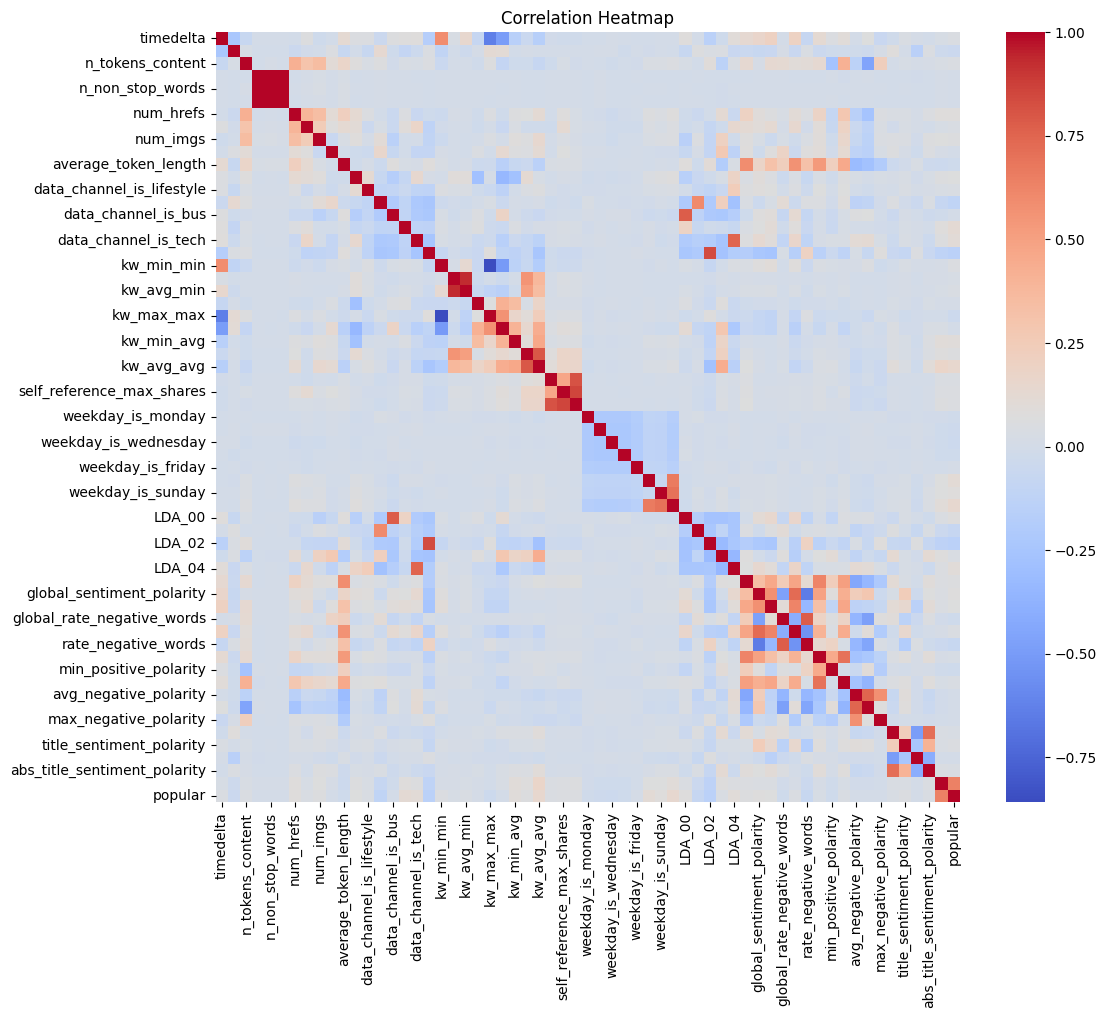

In [10]:
# === Correlation Heatmap ===
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# === Quick Feature Importance using Random Forest Classifier ===
from sklearn.ensemble import RandomForestClassifier

# Prepare simple data for quick feature check
X_temp = df.drop(['shares', 'popular'], axis=1)
y_temp = df['popular']

# One-hot encode publish_day if present
X_temp = pd.get_dummies(X_temp, columns=['publish_day'], drop_first=True)

In [12]:
# Fit a quick RF model for feature importance
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_temp, y_temp)

importances = pd.DataFrame({
    'Feature': X_temp.columns,
    'Importance': rf_temp.feature_importances_
}).sort_values(by='Importance', ascending=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11604\3687435835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(20), x='Importance', y='Feature', palette='viridis')


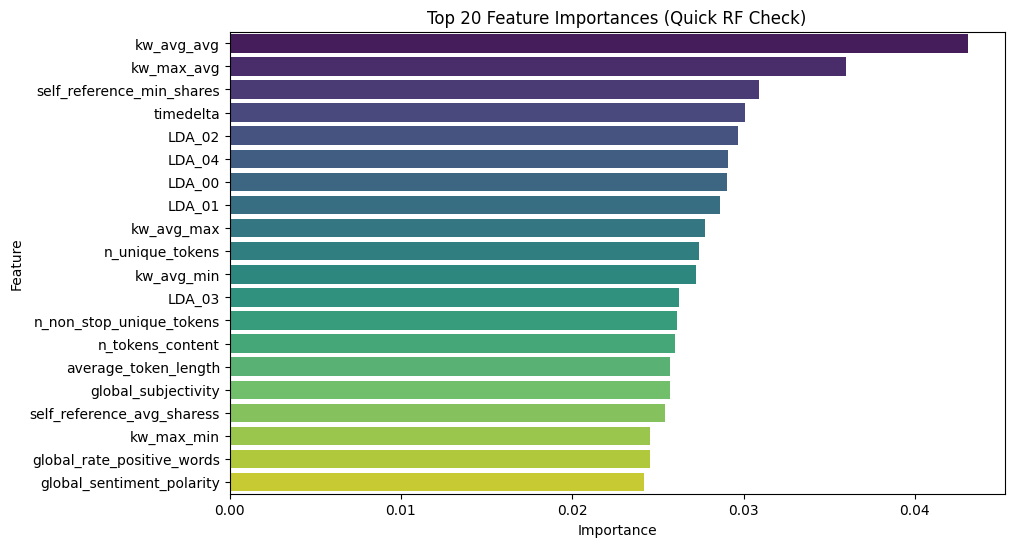


✅ EDA Completed!


In [13]:
# Plot top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances (Quick RF Check)")
plt.show()

print("\n✅ EDA Completed!")